In [5]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



In [6]:
# Load CSV into DF

file_path = 'Resources/Forested_Areas.csv'
forest_df = pd.read_csv(file_path, encoding='utf-8')

forest_df.head()

,Country,Forested Area (%),Life Expectancy (years)
0,Suriname,98.3,71.6
1,Federated States of Micronesia,91.9,67.8
2,Gabon,90.0,66.2
3,Seychelles,88.4,72.8
4,Palau,87.6,69.1


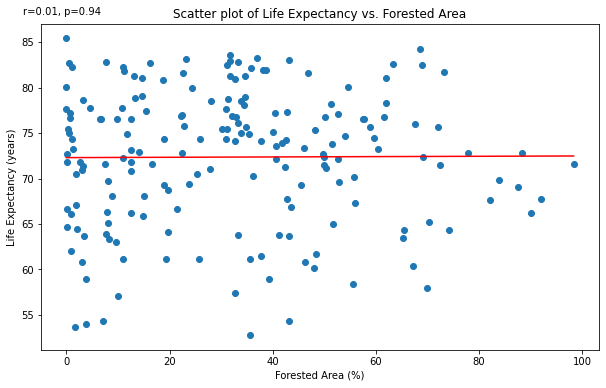

In [7]:
# Determine plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])

# Plot the regression line
plt.plot(forest_df["Forested Area (%)"], intercept + slope * forest_df["Forested Area (%)"], color='red')

# Calculate and annotate the correlation coefficient and p-value
r, p = pearsonr(forest_df["Forested Area (%)"], forest_df["Life Expectancy (years)"])
plt.annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.1, 0.9), xycoords=plt.gcf().transFigure)

# Label Chart
plt.xlabel('Forested Area (%)')
plt.ylabel('Life Expectancy (years)')
plt.title('Scatter plot of Life Expectancy vs. Forested Area')
plt.show()

In [13]:
# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div([
    # Dropdown menu for selecting a country
 dcc.Dropdown(
   id='country-dropdown',
   options=[{'label': i, 'value': i} for i in forest_df['Country'].unique()],
   value=forest_df['Country'].iloc[0]
 ),
    # Graph object for displaying the scatter plot
 dcc.Graph(id='scatter-plot')
])

# Define a callback function that updates the scatter plot based on the selected country
@app.callback(
 Output('scatter-plot', 'figure'),
 Input('country-dropdown', 'value')
)
def update_scatter_plot(selected_country):
    
 # Filter the DataFrame for the selected country
 filtered_df = forest_df[forest_df['Country'] == selected_country]

 # Define X and y
 X = filtered_df["Forested Area (%)"].values.reshape(-1, 1)
 y = filtered_df["Life Expectancy (years)"]

 # Create a scatter plot
 fig = px.scatter(forest_df, x="Forested Area (%)", y="Life Expectancy (years)", color=forest_df['Country'].apply(lambda x: 'green' if x == selected_country else 'blue'), custom_data=['Country'], hover_data=['Country'])

# Customize the hovertemplate
 fig.update_traces(hovertemplate="<b>Country:</b> %{customdata[0]}<br><b>Forested Area:</b> %{x}<br><b>Life Expectancy:</b> %{y}<extra></extra>")

 # Remove the legend
 fig.update_layout(showlegend=False)

# Return the figure object which will be used to render the scatter plot
 return fig

# Run application
if __name__ == '__main__':
 app.run_server(debug=True)
